<a href="https://colab.research.google.com/github/igbokwewinnie/PRODIGY_ML_04/blob/main/HandGesture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras import backend as k
from tensorflow.keras.optimizers import Adam

In [2]:
#load dataset
train = pd.read_csv('/content/drive/MyDrive/handgesture/sign_mnist_train/sign_mnist_train.csv')
test = pd.read_csv('/content/drive/MyDrive/handgesture/sign_mnist_test/sign_mnist_test.csv')

In [3]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
#getting our labels
labels = train['label'].values

<Axes: ylabel='count'>

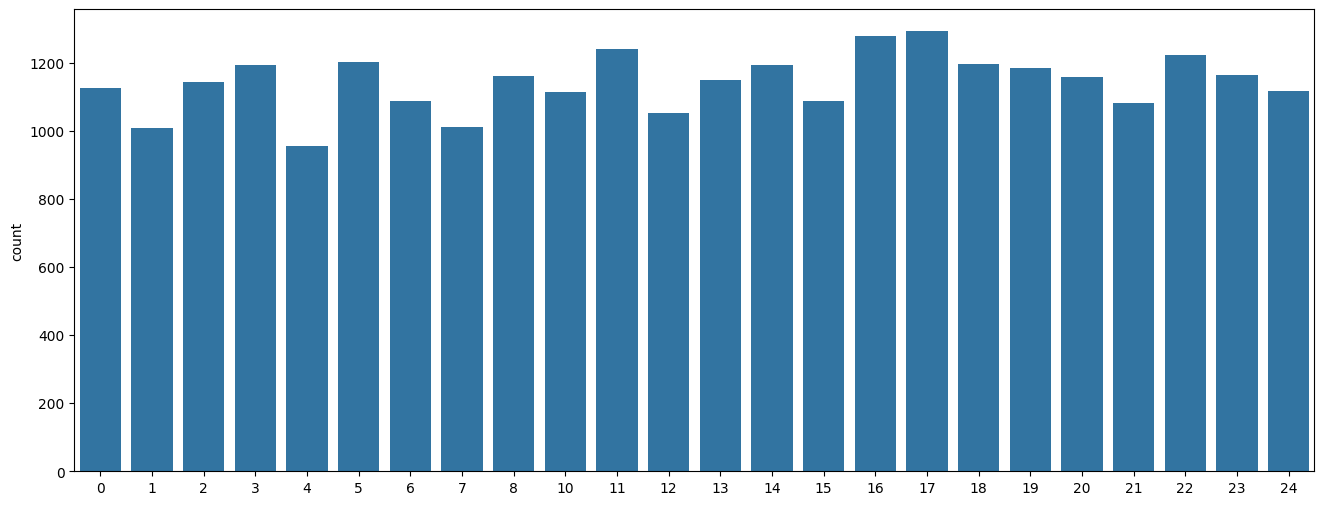

In [5]:
plt.figure(figsize = (16, 6))
sns.countplot(x = labels)

In [6]:
#dropping our training labels data
train.drop('label', axis=1, inplace=True)

In [7]:
images = train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

In [8]:
#one hot encoding
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer()
labels = label_binarizer.fit_transform(labels)

In [9]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


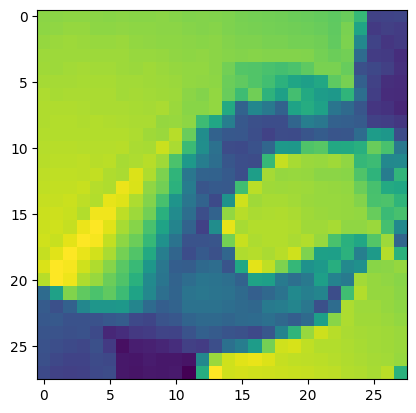

In [10]:
index = 3
print(labels[index])
plt.imshow(images[index].reshape(28, 28))

In [11]:
#splitting our data
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [12]:
batch_size = 128
num_classes = 24
epochs = 10

In [13]:
#scaling our images
x_train = x_train / 255
x_test = x_test / 255

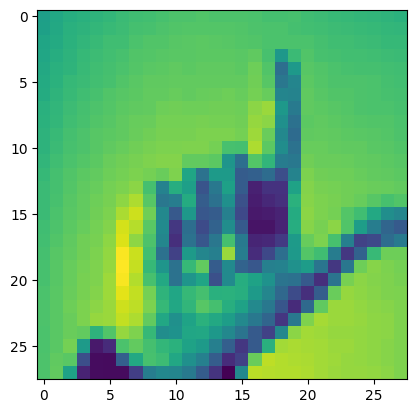

In [14]:
#reshaping our images
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

plt.imshow(x_train[6].reshape(28,28))

In [15]:
#ceate our CNN
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size=(3,3), activation = "relu", input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64,kernel_size=(3,3),activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides = 2))

model.add(Conv2D(filters = 64,kernel_size=(3,3),activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides = 2))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.20))

#output layer
model.add(Dense(num_classes, activation= 'softmax'))


In [16]:
#compiling our model
model.compile(loss = 'categorical_crossentropy',
              optimizer =Adam(),
              metrics=['accuracy'])

In [17]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/10
172/172 [==============================] - 8s 11ms/step - loss: 2.5064 - accuracy: 0.2287 - val_loss: 1.3964 - val_accuracy: 0.5494
Epoch 2/10
172/172 [==============================] - 1s 7ms/step - loss: 1.1000 - accuracy: 0.6309 - val_loss: 0.7294 - val_accuracy: 0.7673
Epoch 3/10
172/172 [==============================] - 1s 7ms/step - loss: 0.6445 - accuracy: 0.7806 - val_loss: 0.3795 - val_accuracy: 0.8814
Epoch 4/10
172/172 [==============================] - 1s 6ms/step - loss: 0.3992 - accuracy: 0.8612 - val_loss: 0.2260 - val_accuracy: 0.9368
Epoch 5/10
172/172 [==============================] - 1s 7ms/step - loss: 0.2596 - accuracy: 0.9116 - val_loss: 0.1666 - val_accuracy: 0.9510
Epoch 6/10
172/172 [==============================] - 1s 7ms/step - loss: 0.1740 - accuracy: 0.9445 - val_loss: 0.0774 - val_accuracy: 0.9852
Epoch 7/10
172/172 [==============================] - 2s 10ms/step - loss: 0.1181 - accuracy: 0.9630 - val_loss: 0.0585 - val_accuracy: 0.9894
Epoc

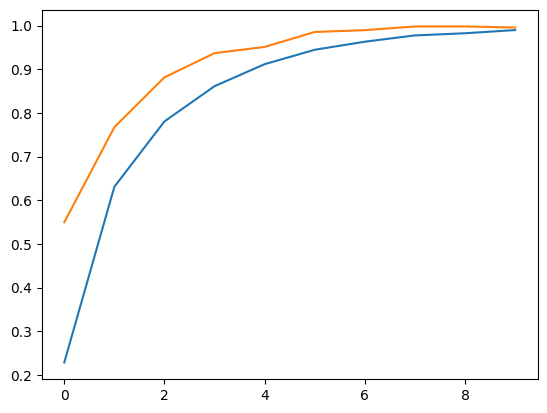

In [18]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')

In [19]:
#testing our model on new data
test_labels = test['label']
test.drop('label', axis = 1, inplace =True)

test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

test_labels = label_binarizer.fit_transform(test_labels)

test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

test_images.shape

y_pred = model.predict(test_images)



225/225 [==============================] - 1s 3ms/step


In [20]:
from sklearn.metrics import accuracy_score

accuracy_score(test_labels, y_pred.round())

0.7730061349693251

In [23]:
def getletter(result):
  classlabels = { 0: 'A',
1: 'B',
2: 'C',
3: 'D',
4: 'E',
5: 'F',
6: 'G',
7: 'H',
8: 'I',
9: 'K',
10: 'L',
11: 'M',
12: 'N',
13: 'O',
14: 'P',
15: 'Q',
16: 'R',
17: 'S',
18: 'T',
19: 'U',
20: 'V',
21: 'W',
22: 'X',
23: 'Y'
  }

  try:
    res = int(resplit)
    return classlabels[res]
  except:
      return "Error"


In [29]:
!pip install opencv-python
import cv2
import numpy as np

#testing on an actual webcam
cap = cv2.VideoCapture(0)
while True:
  ret, frame = cap.read()
  if ret == False:
    break

  roi = frame[100:400, 320:620]
  cv2.imshow('roi', roi)
  roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
  roi = cv2.resize(roi, (28,28), interpolation = cv2.INTER_AREA)

  cv2.imshow('roi sacled and gray', roi)
  copy = frame.copy()
  cv2.rectangle(copy, (320, 100), (620,400), (255,0,0),5)

  roi = roi.reshape(1,28,28,1)

  result = str(model.predict_classes(roi, 1, verbose = 0)[0])
  cv2.putText(copy, getLetter(result), (300,100), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 2)
  cv2.imshow('frame', copy)

  if cv2.waitKey(1) == 13: #13 is the enter key
    break

cap.release()
cv2.destroyAllWindows()